In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [3]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [5]:
labels = pd.read_pickle('../Embedding Generation/EEG_raw.pkl')['wn_id']
def avg_embeddings(embeddings_mat,labels):
    df = pd.DataFrame({'embeddings':embeddings_mat.tolist(),'labels':labels})
    df['embeddings'] = df['embeddings'].apply(lambda x:np.array(x))
    grouped_embeddings = df.groupby('labels').agg('mean').reset_index()
    return np.vstack(grouped_embeddings['embeddings'].to_numpy())

In [30]:
word_embeddings = np.load('Embeddings/word_embeddings.npy')
word_embeddings = StandardScaler().fit_transform(word_embeddings)
word_embeddings = avg_embeddings(word_embeddings,labels)

img_embeddings = np.load('Embeddings/image_embeddings.npy')
img_embeddings = StandardScaler().fit_transform(img_embeddings)
img_embeddings = avg_embeddings(img_embeddings,labels)

eeg_embeddings = np.load('Embeddings/eegnet_embeddings.npy')
# eeg_embeddings = np.load('Embeddings/timeseries_embeddings.npy')
eeg_embeddings = StandardScaler().fit_transform(eeg_embeddings)
eeg_embeddings = avg_embeddings(eeg_embeddings,labels)

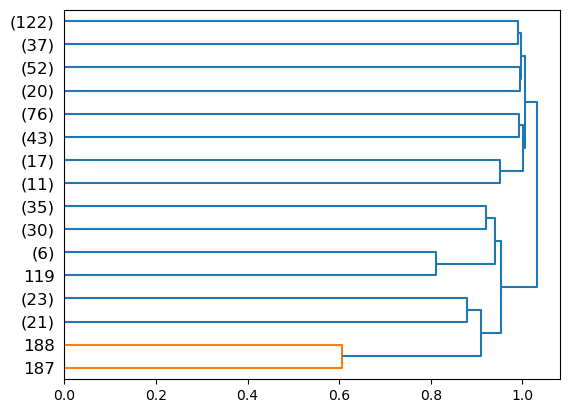

In [56]:
clustering = AgglomerativeClustering(metric='cosine',linkage='average',distance_threshold=0, n_clusters=None).fit(img_embeddings)
plot_dendrogram(clustering, truncate_mode="level",p=3,orientation='right',count_sort='ascending',show_leaf_counts = True)

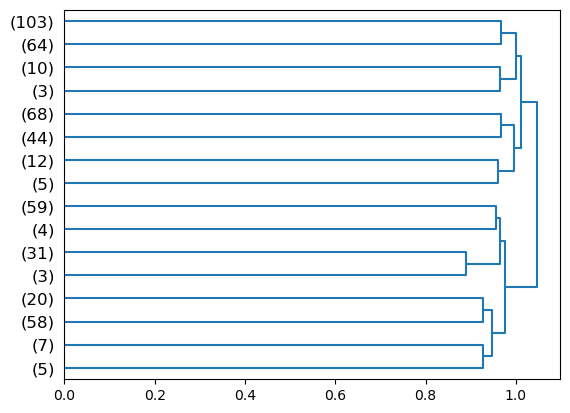

In [57]:
clustering = AgglomerativeClustering(metric='cosine',linkage='average',distance_threshold=0, n_clusters=None).fit(word_embeddings)
plot_dendrogram(clustering, truncate_mode="level",p=3,orientation='right')

In [20]:
clustering.n_clusters_

496